    area  price         street          ward    district
0   80.0   1.60  Trần Văn Giàu  Phạm Văn Hai  Bình Chánh
1   80.0   1.35  Trần Văn Giàu  Phạm Văn Hai  Bình Chánh
2   95.0   2.25  Trần Văn Giàu  Phạm Văn Hai  Bình Chánh
3  130.0   1.95  Trần Văn Giàu  Phạm Văn Hai  Bình Chánh
4  500.0   3.75  Trần Văn Giàu  Phạm Văn Hai  Bình Chánh
Data length:  123


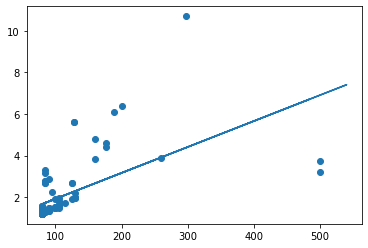

Linear Regression training model score:  0.6737723204151351


In [37]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model

def getData():
    street = 'Trần Văn Giàu'
    ward = 'Phạm Văn Hai'
    district = 'Bình Chánh'
    
    conn = psycopg2.connect(database="real_estate_data", user="postgres", password="361975Warcraft")
    # cur = conn.cursor()
    query = """
        SELECT area, price, street, ward, district
        FROM bds_realestatedata 
        WHERE
            post_type = 'Bán đất' AND
            area IS NOT NULL AND
            price IS NOT NULL AND
            street = '{street}' AND
            ward = '{ward}' AND
            district = '{district}';
    """.format(street=street, ward=ward, district=district)
    # cur.execute(query)
    # data = cur.fetchall()
    data = pd.read_sql_query(query, con=conn)
    return data

data = getData()
print(data.head())
print("Data length: ", len(data))

# convert to array:
# area = np.array(data['area'])
# price = np.array(data['price'])
# plt.scatter(area, price, marker='o')
# plt.show()

if data is not None:
    # Selection few attributes
    attributes = list(
        [
            'area',
        ]
    )
    
    # Vector attributes of lands
    X = data[attributes]
    # Vector price of land
    Y = data['price']
    
    # Convert into arr:
    X = np.array(X)
    Y = np.array(Y)
    
    # plt.plot(Y)
    # plt.show()
    
    # Split data to training test and testing test
    # training data : testing data = 80 : 20
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Linear Regression Model:
def linearRegressionModel(X_train, Y_train, X_test, Y_test):
    model = linear_model.LinearRegression()

    # Training process
    model.fit(X_train, Y_train)
    
    # Evaluating the model
    yfit = model.predict(X_test)
    plt.scatter(X_train, Y_train, marker='o')
    plt.plot(X_test, yfit)
    plt.show()
    
    score_trained = model.score(X_test, Y_test)

    return score_trained

# Lasso Model:
def lassoRegressionModel(X_train, Y_train, X_test, Y_test):
    model = linear_model.Lasso(alpha=1.0)

    # Training process:
    model.fit(X_train, Y_train)

    # Evaluation the model:
    score_trained = model.score(X_test, Y_test)
    
    return score_trained

print("Linear Regression training model score: ", linearRegressionModel(X_train, Y_train, X_test, Y_test))
# print("Lasso Regression training model score: ", lassoRegressionModel(X_train, Y_train, X_test, Y_test))

   area  price       street ward district
0  80.0   5.10  Quang Trung   10   Gò Vấp
1  24.0   2.90  Quang Trung   10   Gò Vấp
2  82.0   5.00  Quang Trung   10   Gò Vấp
3  30.0   3.20  Quang Trung   10   Gò Vấp
4  25.0   2.75  Quang Trung   10   Gò Vấp
Data length:  77


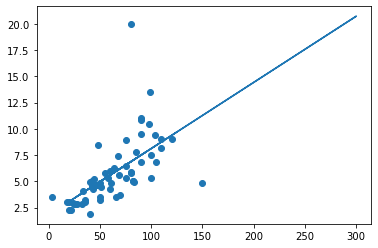

Linear Regression training model score:  0.6606288062088039


In [41]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model

def getData():
    street = 'Quang Trung'
    ward = '10'
    district = 'Gò Vấp'
    
    conn = psycopg2.connect(database="real_estate_data", user="postgres", password="361975Warcraft")
    # cur = conn.cursor()
    query = """
        SELECT area, price, street, ward, district
        FROM bds_realestatedata 
        WHERE
            post_type = 'Bán nhà riêng' AND
            area IS NOT NULL AND
            price IS NOT NULL AND
            street = '{street}' AND
            ward = '{ward}' AND
            district = '{district}';
    """.format(street=street, ward=ward, district=district)
    # cur.execute(query)
    # data = cur.fetchall()
    data = pd.read_sql_query(query, con=conn)
    return data

data = getData()
print(data.head())
print("Data length: ", len(data))

# convert to array:
# area = np.array(data['area'])
# price = np.array(data['price'])
# plt.scatter(area, price, marker='o')
# plt.show()

if data is not None:
    # Selection few attributes
    attributes = list(
        [
            'area',
        ]
    )
    
    # Vector attributes of lands
    X = data[attributes]
    # Vector price of land
    Y = data['price']
    
    # Convert into arr:
    X = np.array(X)
    Y = np.array(Y)
    
    # plt.plot(Y)
    # plt.show()
    
    # Split data to training test and testing test
    # training data : testing data = 80 : 20
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Linear Regression Model:
def linearRegressionModel(X_train, Y_train, X_test, Y_test):
    model = linear_model.LinearRegression()

    # Training process
    model.fit(X_train, Y_train)
    
    # Evaluating the model
    yfit = model.predict(X_test)
    plt.scatter(X_train, Y_train, marker='o')
    plt.plot(X_test, yfit)
    plt.show()
    
    score_trained = model.score(X_test, Y_test)

    return score_trained

# Lasso Model:
def lassoRegressionModel(X_train, Y_train, X_test, Y_test):
    model = linear_model.Lasso(alpha=1.0)

    # Training process:
    model.fit(X_train, Y_train)

    # Evaluation the model:
    score_trained = model.score(X_test, Y_test)
    
    return score_trained

print("Linear Regression training model score: ", linearRegressionModel(X_train, Y_train, X_test, Y_test))
# print("Lasso Regression training model score: ", lassoRegressionModel(X_train, Y_train, X_test, Y_test))